In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Omdena_Project/Disaster Images/DisasterImages/

/content/drive/.shortcut-targets-by-id/1kCJm_BfCSDwqN8da_qZJ7R7Gu4q2SP9e/Disaster Images/DisasterImages


In [ ]:
Path = '/content/drive/.shortcut-targets-by-id/1kCJm_BfCSDwqN8da_qZJ7R7Gu4q2SP9e/Disaster Images/DisasterImages'
#Path='/content/drive/MyDrive/Train_Test/Test'
# Path='/content/drive/MyDrive/Disaster Images SA'

In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
##################### Making Essential Imports ############################
import sklearn
import os
import sys
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model, Model
conf = r'-- oem 2'

In [ ]:
#####################################
# Defining a skeleton for our       #
# DataFrame                         #
#####################################
DataFrame = {
    'photo_name' : [],
    'flattenPhoto' : [],
    'text' : [],
    }

In [ ]:
#######################################################################################
#      The Approach is to apply transfer learning hence using Resnet50 as             #
#      pretrained model                                                               #
#######################################################################################

#MyModel = tf.keras.models.Sequential()
from keras.applications import VGG16

#MyModel.add(tf.keras.applications.ResNet50(include_top = False, weights='imagenet', pooling='avg'))
vgg=VGG16(include_top = False, weights='imagenet', pooling='avg')

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# freezing weights for 1st layer
for i in vgg.layers:
    i.trainable = False

In [ ]:
### Now defining dataloading Function
def LoadDataAndDoEssentials(path, h, w):

    img = cv2.imread(path)
    #DataFrame['text'].append(pytesseract.image_to_string(img, config = conf))
    img = cv2.resize(img, (h, w))
    ## Expanding image dims so this represents 1 sample
    img = img = np.expand_dims(img, 0)
    #img = vgg.preprocess_input(img)
    img=tf.keras.applications.vgg16.preprocess_input(img)
    extractedFeatures = vgg.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    DataFrame['flattenPhoto'].append(extractedFeatures.flatten())

In [ ]:
### with this all done lets write the iterrrative loop
def ReadAndStoreMyImages(path):

    list_ = os.listdir(path)
    for mem in list_:
        DataFrame['photo_name'].append(mem)
        imagePath = path + '/' + mem
        LoadDataAndDoEssentials(imagePath, 224, 224)
        

In [ ]:
### lets give the address of our Parent directory and start
ReadAndStoreMyImages(Path)

1/1 [==============================] - 0s 387ms/step


In [ ]:
######################################################
#        lets now do clustering                      #
######################################################
Training_Feature_vector = np.array(DataFrame['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 2)
kmeans.fit(Training_Feature_vector)

AgglomerativeClustering()

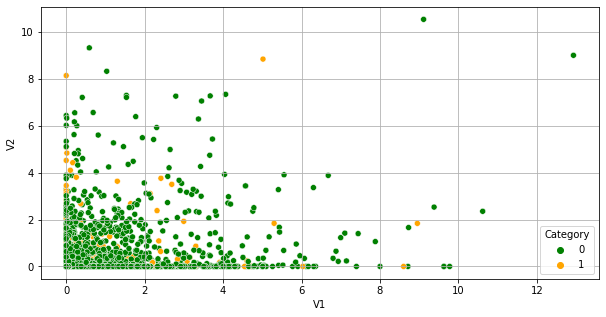

In [ ]:
## lets make this a dataFrame
import seaborn as sb
import matplotlib.pyplot as plt

dimReducedDataFrame = pd.DataFrame(Training_Feature_vector)

dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2'})
dimReducedDataFrame['Category'] = list(kmeans.labels_)
plt.figure(figsize = (10, 5))
sb.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',
                    palette=['green','orange'],hue = 'Category') 
plt.grid(True)
plt.show()

In [ ]:
dimReducedDataFrame.head()

,V1,V2,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,Category
0,2.528315,0.000000,27.385260,0.000000,8.122732,0.000000,1.326112,1.007058,0.000000,0.000000,...,0.724293,0.000000,2.179376,0.000000,1.844759,0.972502,0.065492,1.579148,3.086615,0
1,1.627500,0.000000,0.406179,1.117357,0.000000,7.557020,0.064426,0.218409,0.000000,0.827251,...,0.382539,0.781508,3.364582,0.074502,2.790625,1.011059,1.167836,5.182934,0.101466,0
2,0.000000,0.240789,2.788764,2.654600,0.130182,1.567038,0.816235,0.000000,1.884325,4.263436,...,0.286799,5.594783,0.000000,0.000000,0.664794,1.495033,0.000000,1.756124,1.082276,0
3,0.064761,0.000000,4.263485,0.000000,3.605032,1.067353,0.000000,0.196489,1.424932,0.348216,...,5.519069,2.027612,6.245219,2.387608,0.000000,0.906880,0.000000,1.916847,4.922625,0
4,0.461762,0.944289,0.411782,0.000000,4.854740,1.235340,0.221810,0.413040,2.072284,2.988714,...,8.374022,0.218114,4.871241,1.823893,0.130363,4.821368,1.592326,0.455701,35.094536,0


In [ ]:
#we can plot the images if required here

clust_list={0:0,1:0}
Seperated_images_name = {'Disaster':[],'Non Disaster':[]}

for index,i in enumerate(dimReducedDataFrame['Category']):
    if i in clust_list.keys():
        clust_list[i]=clust_list[i]+1

        if i==0:
          Seperated_images_name['Disaster'].append(DataFrame['photo_name'][index])
        elif i==1:
          Seperated_images_name['Non Disaster'].append(DataFrame['photo_name'][index])
          
clust_list    

{0: 1494, 1: 254}

In [ ]:
(Seperated_images_name['Non Disaster'])

['rot_45_102.jpg',
 'rot_45_114.jpg',
 'rot_45_105.jpg',
 'rot_45_121.jpg',
 'rot_45_1.jpg',
 'rot_45_113.jpg',
 'rot_45_120.jpg',
 'rot_45_110.jpg',
 'rot_45_116.jpg',
 'rot_45_104.jpg',
 'rot_45_101.jpg',
 'rot_45_122.jpg',
 'rot_45_109.jpg',
 'rot_45_103.jpg',
 'rot_45_11.jpg',
 'rot_45_115.jpg',
 'rot_45_100.jpg',
 'rot_45_0.jpg',
 'rot_45_112.jpg',
 'rot_45_117.jpg',
 'rot_45_10.jpg',
 'rot_45_111.jpg',
 'rot_45_106.jpg',
 'rot_45_119.jpg',
 'rot_45_12.jpg',
 'rot_45_118.jpg',
 'rot_45_107.jpg',
 'rot_45_211.jpg',
 'rot_45_190.jpg',
 'rot_45_157.jpg',
 'rot_45_186.jpg',
 'rot_45_156.jpg',
 'rot_45_21.jpg',
 'rot_45_181.jpg',
 'rot_45_220.jpg',
 'rot_45_207.jpg',
 'rot_45_139.jpg',
 'rot_45_177.jpg',
 'rot_45_182.jpg',
 'rot_45_185.jpg',
 'rot_45_153.jpg',
 'rot_45_224.jpg',
 'rot_45_19.jpg',
 'rot_45_166.jpg',
 'rot_45_178.jpg',
 'rot_45_155.jpg',
 'rot_45_192.jpg',
 'rot_45_203.jpg',
 'rot_45_146.jpg',
 'rot_45_173.jpg',
 'rot_45_128.jpg',
 'rot_45_17.jpg',
 'rot_45_184.jpg',
 'r

In [ ]:
############################################################

In [ ]:
#To visualise the elbow point
from sklearn.cluster import KMeans

#kMeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dimReducedDataFrame)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


AgglomerativeClustering()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

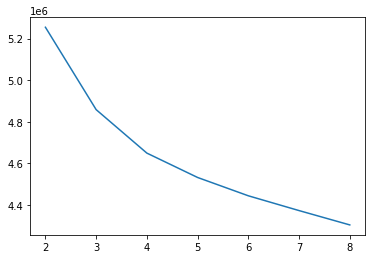

In [ ]:
ssd = []
range_of_clusters = [2, 3, 4, 5, 6, 7, 8]
for num in range_of_clusters:
    kmeans = KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(dimReducedDataFrame)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_of_clusters,ssd)